---
title: "The Google's Guide to Exploratory Data Analysis "

description: "EDA is a way of summarizing, interpreting and visualizing the information hidden in rows and column format."

author: "Vidyasagar Bhargava"
date: "06/11/2019"
categories:
  - eda
  - python  
image: https://i.imgur.com/P28ODCt.png
---

### Why EDA is important ?

Usually we start any data science project with understanding the business problem and then we generate hypothesis. During hypothesis generation we look for factors which influence our dependent variable. EDA helps in confirming and validating those hypothesis.

It helps to find out unexpected pattern in data which must be taken into account, thereby suggesting some changes in planned analysis.

It helps in delivering data driven insights to business stakeholders by confirming they are asking the right questions and not biasing the investigation with their assumptions.

### How to EDA ?  

As a data scientist we need to do comprehensive exploration of the dataset and gain deep understanding of data. I divide exploratory data analysis in 3 parts of investigation.  

1. **Structure of data** : Exploring shape and as well as data types.  
    1.1 Structure of non numerical features   
    1.2 Structure of numerical features   
    1.3 Conclusion of structure investigation   

2. **Quality of data** : To check general quality of datasets in regard to duplicates,missing values and unwanted entries.  
    2.1 Duplicates  
    2.2 Missing Values   
        2.2.1 Per sample  
        2.2.2 Per feature  
    2.3 Unwanted Entries and Recording Errors  
        2.3.1 Numerical features  
        2.3.2 Non Numerical features   
    2.4 Conclusion of Quality Investigation  
    
3. **Content Investigation & Predictive Power** : More indepth study of features and how they relate to each other.  
    3.1 Feature distribution  
    3.2 Feature patterns  
        3.2.1 Continuos feature  
        3.2.2 Discreet and ordinal feature  
    3.3 Feature relantionship

### Example Case

Let's download some data and perform eda to bring insights as well know quality of the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml


In [3]:
# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

# Extract feature matrix X and show 5 random samples
df_X = dataset["frame"]
df_X.head(5)

,Accident_Index,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,201501BS70001,1.0,19.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,7.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,NaN,NaN
1,201501BS70002,1.0,9.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,...,5.0,3.0,9.0,9.0,0.0,0.0,2.0,0.0,1.0,3.0
2,201501BS70004,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,6.0,3.0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,6.0
3,201501BS70005,1.0,9.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0,...,2.0,3.0,5.0,1.0,0.0,0.0,2.0,0.0,1.0,2.0
4,201501BS70008,1.0,1.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,...,8.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0


### Structure Investigation

In [4]:
df_X.shape

(363243, 67)

In [5]:
import pandas as pd
pd.value_counts(df_X.dtypes)

float64    61
object      6
dtype: int64

### Structure of Non Numerical Features

In [6]:
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()

,Accident_Index,Sex_of_Driver,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
0,201501BS70001,1.0,12/01/2015,18:45,E09000020,E01002825
1,201501BS70002,1.0,12/01/2015,07:50,E09000020,E01002820
2,201501BS70004,1.0,12/01/2015,18:08,E09000020,E01002833
3,201501BS70005,1.0,13/01/2015,07:40,E09000020,E01002874
4,201501BS70008,1.0,09/01/2015,07:30,E09000020,E01002814


In [7]:
# Changes data type of 'Sex_of_Driver'
df_X["Sex_of_Driver"] = df_X["Sex_of_Driver"].astype("float")

In [8]:
df_X.describe(exclude="number")

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,363243,319866,319822,319866,298758
unique,140056,365,1439,204,25979
top,201543P296025,14/02/2015,17:30,E10000017,E01028497
freq,1332,2144,2972,8457,1456


### Structure of Numerical Features

In [9]:
# from matplotlib.offsetbox import AnnotationBbox, OffsetImage
# import matplotlib.image as mpimg
# def insert_image(path, zoom, xybox, ax):
#     '''Insert an image within matplotlib'''
#     imagebox = OffsetImage(mpimg.imread(path), zoom=zoom)
#     ab = AnnotationBbox(imagebox, xy=(0.5, 0.7), frameon=False, pad=1, xybox=xybox)
#     ax.add_artist(ab)



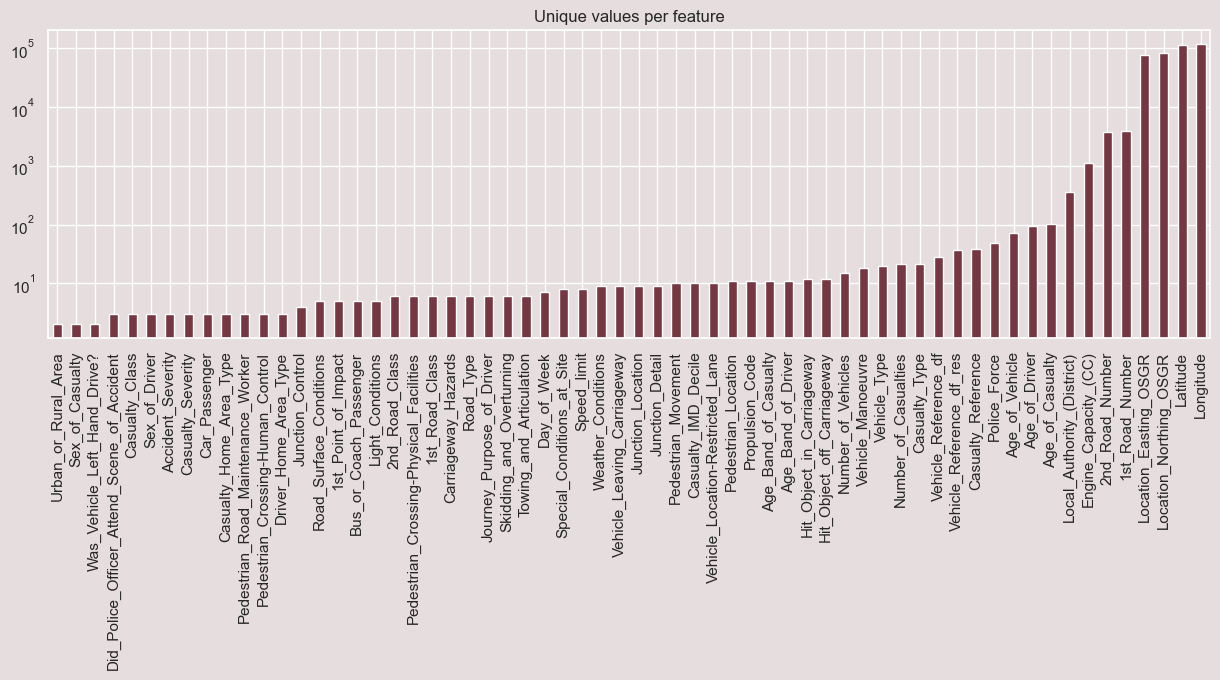

In [10]:
#| column: page
# For each numerical feature compute number of unique entries
sns.set(rc={'axes.facecolor':'#e6ddde', 'figure.facecolor':'#e6ddde'})

fig, ax = plt.subplots(figsize=(10, 8))

unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature",  color='#753742');
plt.savefig('foo.png')

### Quality Investigation
* Duplicates 
* Missing values

#### Duplicates

In [11]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 22 duplicates in your database.


In [12]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["Accident_Index"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 67)

#### Missing Values

In [14]:
# to count missing values
df_X.isna().sum()

Accident_Index                            0
Vehicle_Reference_df_res                  0
Vehicle_Type                             62
Towing_and_Articulation                 379
Vehicle_Manoeuvre                       184
                                      ...  
Bus_or_Coach_Passenger                   46
Pedestrian_Road_Maintenance_Worker      166
Casualty_Type                             0
Casualty_Home_Area_Type               39792
Casualty_IMD_Decile                   69574
Length: 67, dtype: int64

### Content Investigation & Predictive Power
   * Feature distribution  
   * Feature patterns  
        * Continuos feature  
        * Discreet and ordinal feature  
   * Feature relantionship

#### Feature Distribution
1. 5 number Summary of features
2. Histograms 
3. Boxplots
 

In [16]:
df_X.describe()

,Vehicle_Reference_df_res,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
count,363221.000000,363159.000000,362842.000000,363037.000000,363045.000000,363137.000000,363045.000000,363058.000000,363062.000000,363220.000000,...,357653.000000,363221.000000,363219.000000,363219.000000,362459.000000,363175.000000,363055.000000,363221.000000,323429.000000,293647.000000
mean,1.696199,9.757371,0.029768,12.607043,0.109240,2.609183,0.188147,0.307499,0.366709,0.546715,...,6.431323,2.875726,0.380754,0.276483,0.281030,0.066131,0.032835,7.840381,1.308204,5.107292
std,1.487136,8.315227,0.294136,6.218717,0.903158,3.249152,0.714262,1.595598,1.374145,2.094885,...,2.157887,0.355196,1.522263,1.294612,0.591238,0.493189,0.253787,7.366512,0.657791,2.829460
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,9.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,3.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,37.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,11.000000,3.000000,10.000000,9.000000,2.000000,4.000000,2.000000,98.000000,3.000000,10.000000


You can check this [link](https://services.google.com/fh/files/misc/exploratory_data_analysis_for_feature_selection_in_machine_learning.pdf) for guide